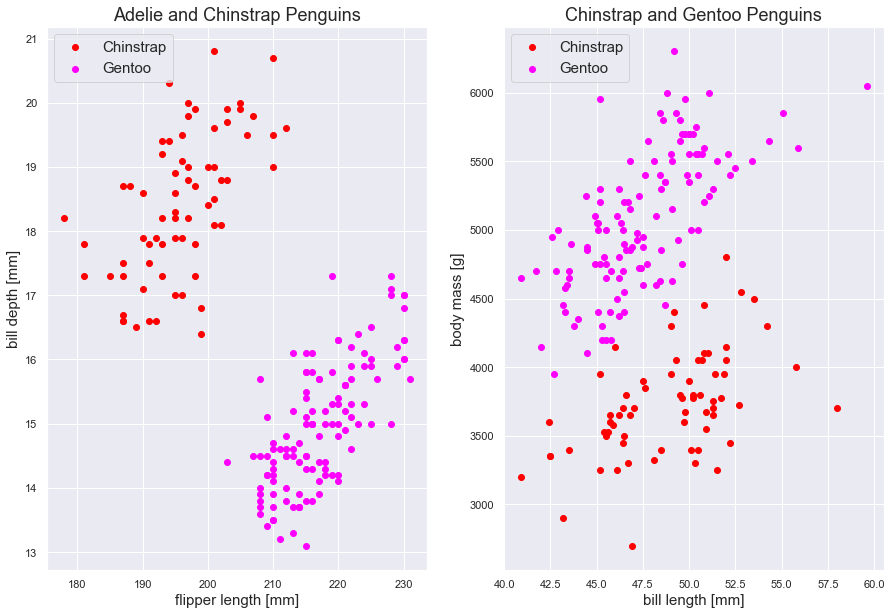

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the iris dataset into a pandas DataFrame object with seaborn
df = sns.load_dataset("penguins")

Adelie = df[df.species == "Adelie"]
Chinstrap = df[df.species == "Chinstrap"]
Gentoo = df[df.species == "Gentoo"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(Chinstrap.flipper_length_mm, 
            Chinstrap.bill_depth_mm, 
            color = "red", 
            label = "Chinstrap")
ax1.scatter(Gentoo.flipper_length_mm, 
            Gentoo.bill_depth_mm, 
            color = "magenta", 
            label = "Gentoo")
ax1.set_xlabel("flipper length [mm]", fontsize = 15)
ax1.set_ylabel("bill depth [mm]", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Adelie and Chinstrap Penguins", fontsize = 18)


ax2.scatter(Chinstrap.bill_length_mm, 
            Chinstrap.body_mass_g, 
            color = "red", 
            label = "Chinstrap")
ax2.scatter(Gentoo.bill_length_mm, 
            Gentoo.body_mass_g, 
            color = "magenta", 
            label = "Gentoo")
ax2.set_xlabel("bill length [mm]", fontsize = 15)
ax2.set_ylabel("body mass [g]", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper left")
ax2.set_title("Chinstrap and Gentoo Penguins", fontsize = 18)
plt.show()

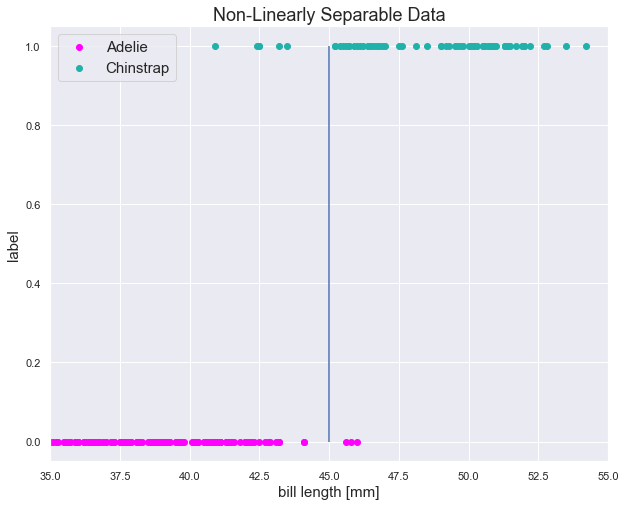

In [22]:
plt.figure(figsize = (10, 8))
plt.xlim((35, 55))
plt.scatter(Adelie.bill_length_mm, 
            np.zeros(152), 
            color = "magenta", 
            label = "Adelie")
plt.scatter(Chinstrap.bill_length_mm, 
            np.ones(68), 
            color = "lightseagreen", 
            label = "Chinstrap")
plt.vlines(45, 0.0, 1.0)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Non-Linearly Separable Data", fontsize = 18)
plt.show()

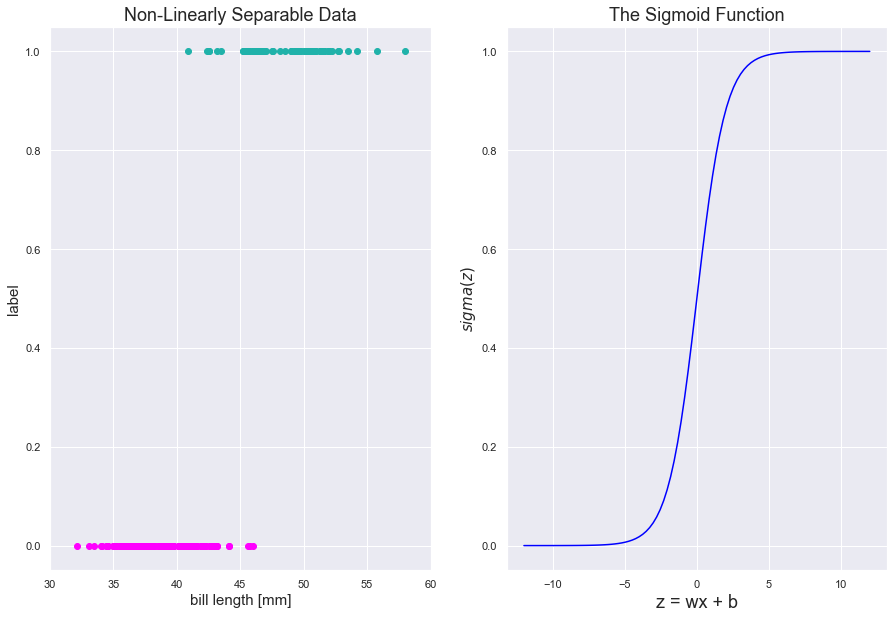

In [60]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.set_xlim((30, 60))
ax1.scatter(Adelie.bill_length_mm, 
            np.zeros(152), 
            color = "magenta", 
            label = "Adelie")
ax1.scatter(Chinstrap.bill_length_mm, 
            np.ones(68), 
            color = "lightseagreen", 
            label = "Chinstrap")
ax1.set_xlabel("bill length [mm]", fontsize = 15)
ax1.set_ylabel("label", fontsize = 15)
ax1.set_title("Non-Linearly Separable Data", fontsize = 18)

domain = np.linspace(-12.0, 12.0, 100)
ax2.plot(domain, 
        sigmoid(domain), 
        color = "blue", 
        label = "$\sigma$(z)")
ax2.set_xlabel("z = wx + b", fontsize = 18)
ax2.set_ylabel("$sigma(z)$", fontsize = 15)
ax2.set_title("The Sigmoid Function", fontsize = 18)
plt.show()

In [24]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

In [63]:
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

node = SingleNeuron(sigmoid, cross_entropy_loss)

X = df.iloc[:222].bill_length_mm.values
X = X.reshape(-1, 1)
X = X[~np.isnan(X).any(axis=1)] # removing rows with NaN's
y = np.where(df.iloc[:222].species == "Adelie", 0, 1)
y = np.delete(y, 3)

node.train(X, y, alpha = 0.01, epochs = 10_000)

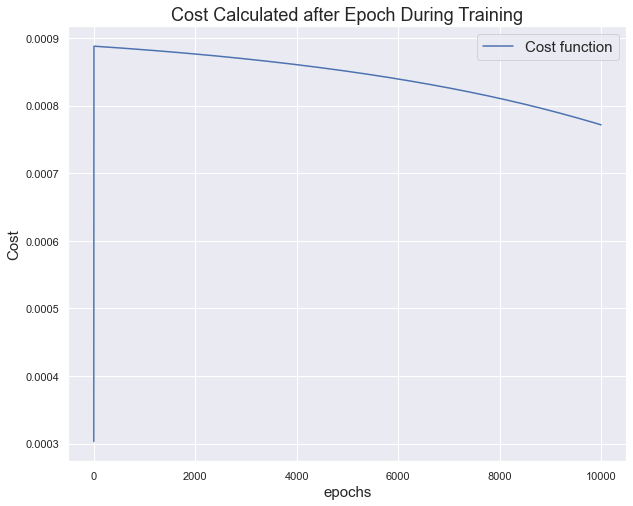

In [65]:
node.plot_cost_function()
plt.show()

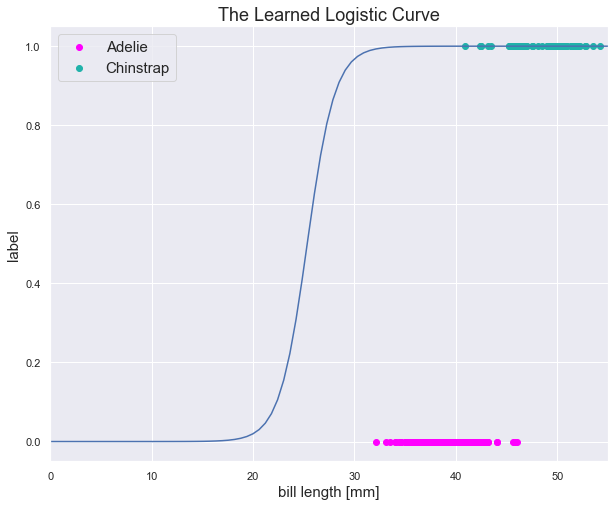

In [66]:
plt.figure(figsize = (10, 8))
plt.xlim((0, 55))
plt.scatter(Adelie.bill_length_mm, 
            np.zeros(152), 
            color = "magenta", 
            label = "Adelie")
plt.scatter(Chinstrap.bill_length_mm, 
            np.ones(68), 
            color = "lightseagreen", 
            label = "Chinstrap")

domain = np.linspace(0, 60, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

In [67]:
node.predict(X)

array([0.99995731, 0.99996814, 0.99998225, 0.99975304, 0.99996312,
       0.99995059, 0.99996032, 0.99834814, 0.99999488, 0.99988953,
       0.99988953, 0.99999012, 0.99993846, 0.99885355, 0.9997343 ,
       0.9999428 , 0.99999645, 0.99867318, 0.99999973, 0.99988953,
       0.99988115, 0.99955671, 0.99991755, 0.99994684, 0.99931264,
       0.99998575, 0.99998467, 0.99989732, 0.99998467, 0.99996814,
       0.99982867, 0.99996814, 0.99998856, 0.99969246, 0.99996032,
       0.99994684, 0.99999558, 0.99987213, 0.99997442, 0.99971414,
       0.99998769, 0.99958797, 0.9999989 , 0.99980169, 0.99997039,
       0.99999012, 0.99986242, 0.99958797, 0.99999589, 0.99997039,
       0.99997946, 0.99914412, 0.99999488, 0.99876665, 0.99999206,
       0.99995407, 0.99998575, 0.99971414, 0.99987213, 0.99948692,
       0.99999146, 0.99987213, 0.99999012, 0.99969246, 0.99999314,
       0.99940613, 0.99999012, 0.99955671, 0.99999408, 0.99744035,
       0.99997248, 0.99997039, 0.99999968, 0.99940613, 0.99999

In [68]:
np.rint(node.predict(X)) != y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [69]:
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.6832579185520362
